In [1]:
import src.util as utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
config = utils.load_config()

In [3]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [4]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
x_train

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol
19879,26.920,47.97,938.717,1.52,1163,400,12931,19452
1201,20.377,54.01,939.602,0.84,0,400,13207,20128
24654,-6.409,49.84,939.610,0.63,204,400,13150,20054
11352,26.510,46.24,937.388,1.94,197,432,12766,20526
7771,25.980,44.18,937.445,2.06,0,400,13116,20959
...,...,...,...,...,...,...,...,...
3794,14.910,49.66,939.758,0.33,46,400,13029,19915
1255,13.969,42.48,937.436,1.79,134,400,12876,20586
10086,14.240,44.08,937.348,1.56,184,448,12757,20530
17148,24.250,54.36,938.811,2.08,1358,421,12978,19383


[Text(0.7835249042145593, 0.9642857142857143, 'TVOC[ppb] <= 217.5\ngini = 0.499\nsamples = 13440\nvalue = [6944, 6496]'),
 Text(0.6283524904214559, 0.8928571428571429, 'Raw H2 <= 13208.5\ngini = 0.247\nsamples = 7983\nvalue = [6829, 1154]'),
 Text(0.4099616858237548, 0.8214285714285714, 'Raw H2 <= 13143.5\ngini = 0.099\nsamples = 6657\nvalue = [6308, 349]'),
 Text(0.3103448275862069, 0.75, 'TVOC[ppb] <= 209.5\ngini = 0.004\nsamples = 5370\nvalue = [5358, 12]'),
 Text(0.24904214559386972, 0.6785714285714286, 'Raw H2 <= 13141.5\ngini = 0.0\nsamples = 5302\nvalue = [5301, 1]'),
 Text(0.21839080459770116, 0.6071428571428571, 'gini = 0.0\nsamples = 5263\nvalue = [5263, 0]'),
 Text(0.2796934865900383, 0.6071428571428571, 'Raw Ethanol <= 20054.5\ngini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(0.24904214559386972, 0.5357142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.3103448275862069, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3716475095785

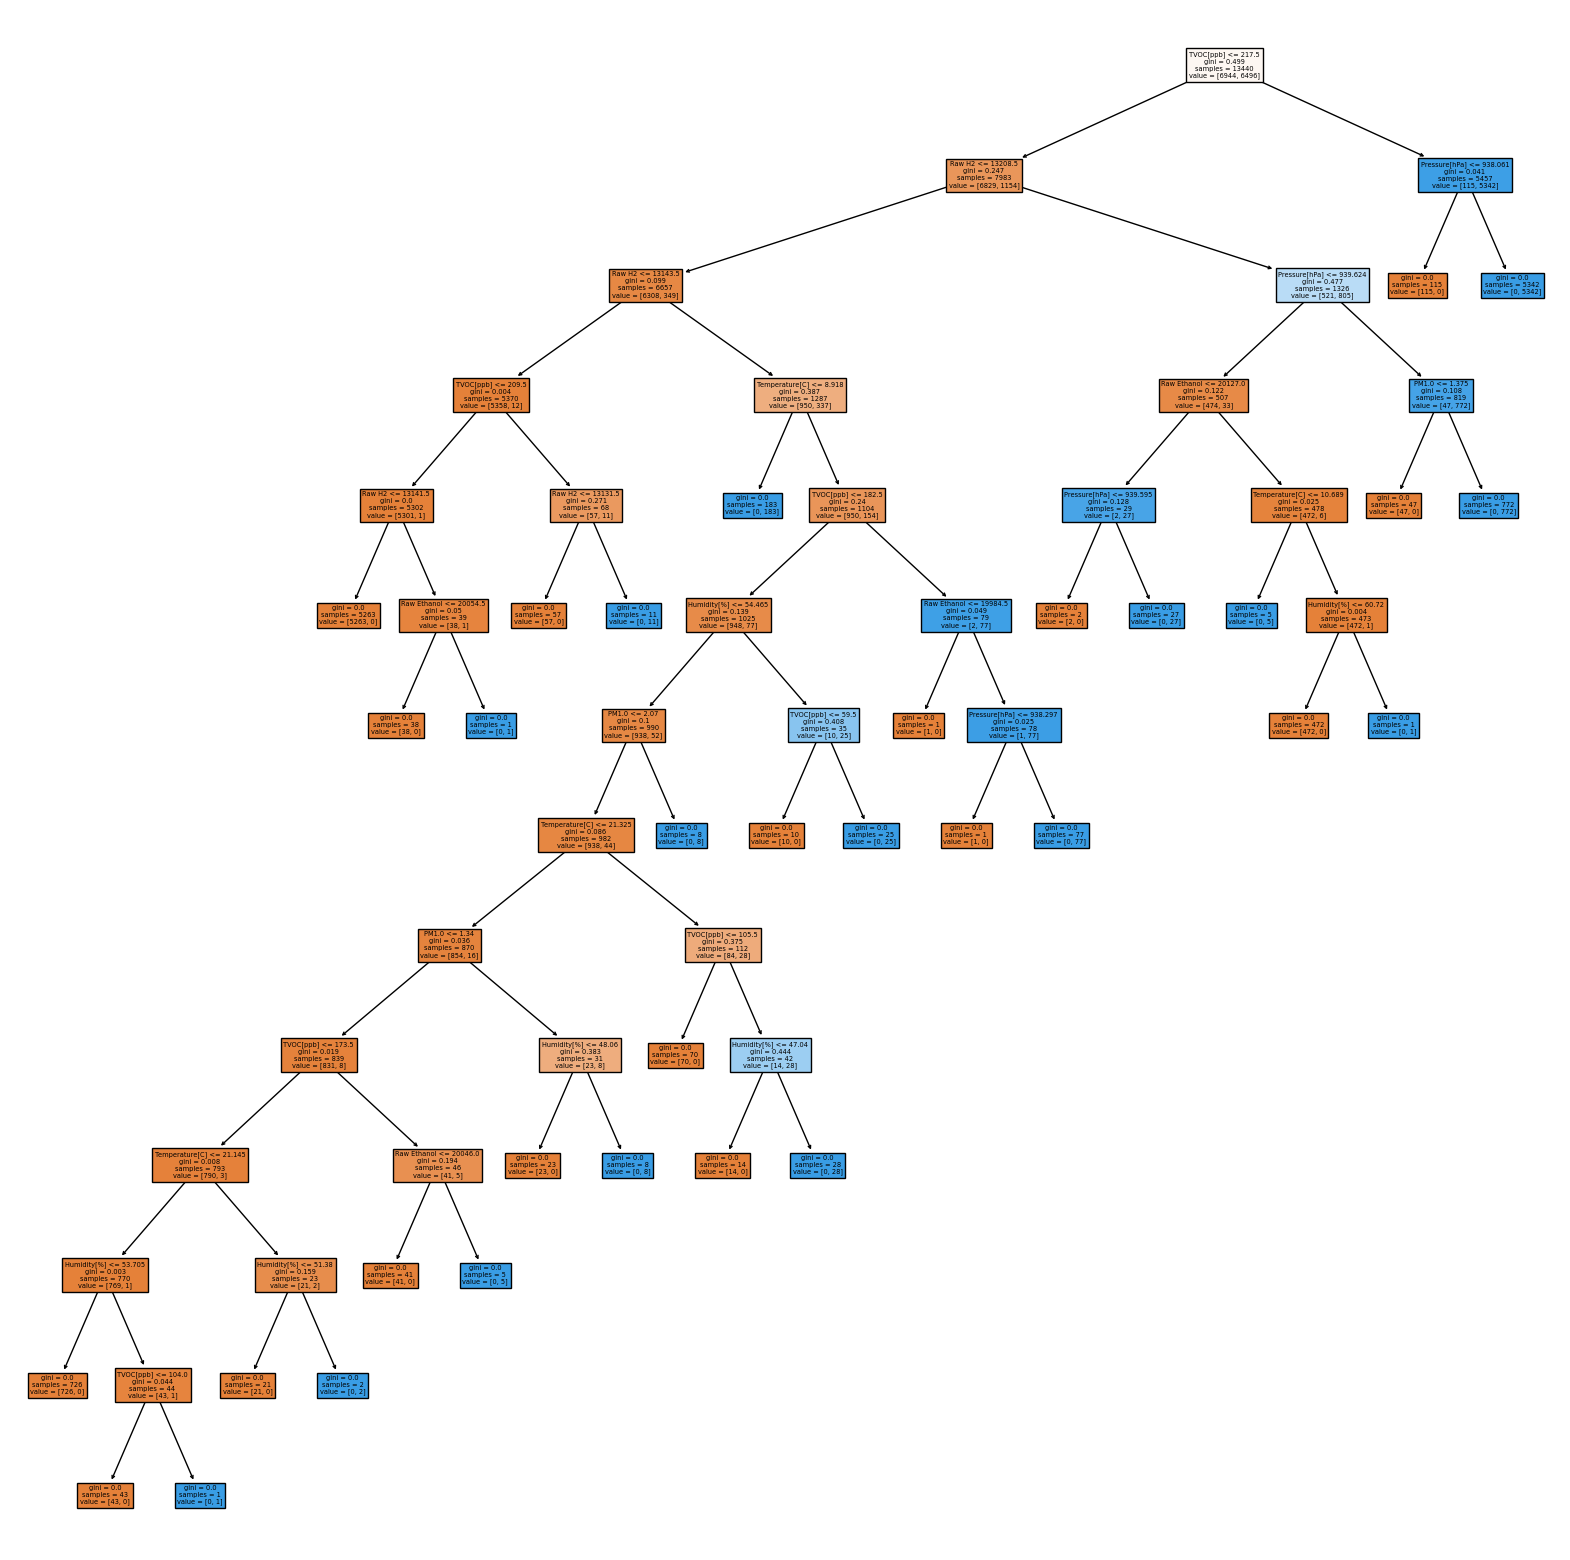

In [8]:
fig, ax = plt.subplots(figsize=(20,20)) 
tree.plot_tree(dtc, filled = True, ax = ax, feature_names = dtc.feature_names_in_)

In [9]:
y_pred = dtc.predict(x_valid)

In [10]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1488
           1       1.00      1.00      1.00      1392

    accuracy                           1.00      2880
   macro avg       1.00      1.00      1.00      2880
weighted avg       1.00      1.00      1.00      2880



In [11]:
y_pred = dtc.predict(x_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1489
           1       1.00      1.00      1.00      1392

    accuracy                           1.00      2881
   macro avg       1.00      1.00      1.00      2881
weighted avg       1.00      1.00      1.00      2881



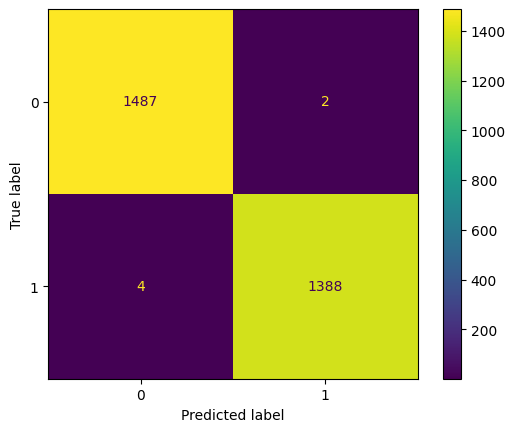

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [15]:
utils.pickle_dump(dtc, config["production_model_path"])